# Using Linear Regression on Housing Data to Develop a Housing Communty
### By Salome Grasland

## Business Understanding
A result of the Covid pandemic is that people are now spending more time in their yards, especially those located in urban and suburban areas. The real estate development group, Steady, has approached us to help design a community of homes made for people who enjoy using their land to grow food, have bee hives, and raise chickens. Steady, wishes to build the community of homes in the most temperate zone of King County, Seattle. This kernel uses the King County Housing Dataset to create a Linear Regression Model that Steady can use to know what features the homes they build should contain in order to be financially successful.  

## Data Understanding 
For this kernel we will be using the King County Housing Dataset from Kaggle. This dataset includes homes sold between May 2014 and May 2015, features 21 columns, and over 21,000 entries. The dataset contains categorical and numerical columns, with data types of integers, objects, and floats. Some of the data types will need to be converted for our analysis. Three columns are missing data– view, waterfront, and yr_renovated-– with the latter two missing more than 10% of their values. Null values will need to be dealt with before modeling. 

### Column Names and Descriptions for King County Data Set
**id** - Unique identifier for a house  
**date** - Date house was sold  
**price** - Sale price (prediction target)  
**bedrooms** - Number of bedrooms  
**bathrooms** - Number of bathrooms  
**sqft_living** - Square footage of living space in the home  
**sqft_lot** - Square footage of the lot  
**floors** - Number of floors (levels) in house  
**waterfront** - Whether the house is on a waterfront  
**view** - Quality of view from house  
**condition** - How good the overall condition of the house is. Related to maintenance of house. See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code  
**grade** - Overall grade of the house. Related to the construction and design of the house. See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code  
**sqft_above** - Square footage of house apart from basement  
**sqft_basement** - Square footage of the basement  
**yr_built** - Year when house was built  
**yr_renovated** - Year when house was renovated  
**zipcode** - ZIP Code used by the United States Postal Service  
**lat** - Latitude coordinate  
**long** - Longitude coordinate  
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors  
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors  

In [2]:
#import libraries & modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#checking available files 
!ls

Phase 2 Project Presentation.pdf
Phase 2 Project.ipynb
README.md
data


In [4]:
#opening the king county housing data 
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We can see that the housing dataset has 21 columns. 

In [5]:
#getting data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are over 21,000 entries in this dataset with three columns missing values (waterfront, view, and yr_renovated), we will need to adjust for missing values. There are also three different data types present: object, int64, and float64. We will have to adjust the datatypes in order to model the data. 

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The homes in this dataset range in price from 78,000 USD to 7,700,000 USD. Some homes are older having been built as early as 1900 with the newest home having been built in 2015. This makes sense since the dataset is limited to homes sold in 2014 to 2015. 

## Data Preparation

In [7]:
#checking null values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that yr_renovated and waterfront are missing more than 10% of their values. In order for our code to function properly we need to remove null values. In this case we will drop these two columns from the dataset. 

In [8]:
#dropping 'yr_renovated' and 'waterfront' because they are missing
#more than 10% of their entries 
#dropping 'id' because its a unique identifier
#dropping 'date' because its not needed for this analysis
#dropping null values remaining 

data.drop('yr_renovated', axis=1, inplace=True)
data.drop('waterfront', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data = data.dropna()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Data Engineering 
In addition to our original dataset 3 columns were constructed: hardiness zones (‘zones’), square footage of lawn (‘sqft_lawn’), and square footage of lawn for the nearest 15 homes (‘sqft_lawn15’). The latter two columns were engineered based on values taken from the sqft_living and sqft_lot columns. The purpose of these columns is to focus on our clients specific issue– building homes that have usable outdoor space in a temperate area.


**King County Hardiness Zones**

A hardiness zone is an area that is defined as having certain annual minimum temperatures, a measure which is of concern to the survival of many plants and livestock. For this project we will be using the United States Department of Agriculture (USDA) Hardiness Zone map of King County and limiting the dataset to homes in zone 8b– King County’s most temperate zone. This is done by constructing a zone column based on values taken from the longitude column.

**King County Hardiness Zones Map**   
Zone 8b is shown in red on the map. 

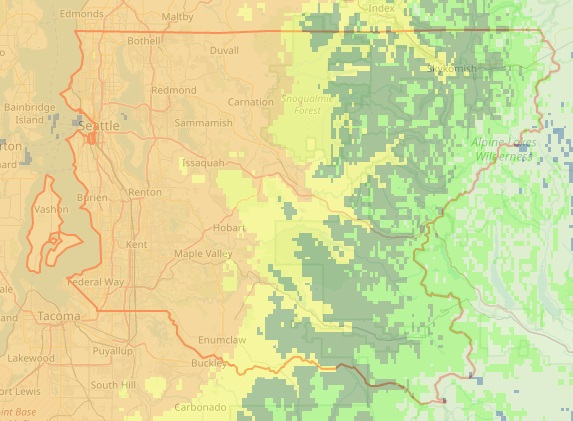

In [9]:
#taking the absolute value of the longitude 
data['long'] = data['long'].abs()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,122.045,1800,7503


In [10]:
#creating zones based on hardiness 
# 8b = 4, 8a = 3, 7b = 2, 7a = 1
x = data['long'].tolist()
res = ["4" if i > 122.2 
       else "3" if i > 122.0 
       else "2" if i > 121.6
       else "1"for i in x]
data['zone'] = res

def group_zone(long_list):
    if long_list[0] < -122.2:
        return '8b'
    elif long_list[0] < -122.0 and long_list[0] > -121.6:
        return '8a'
    elif long_list[0] < -121.6 and long_list[0] > -121.4:
        return '7b'
    else: 
        return '7a'
    
data.apply(lambda row: group_zone(row), axis=1)
data['zone'] = data.apply(lambda row: group_zone(row), axis=1)
data.head()

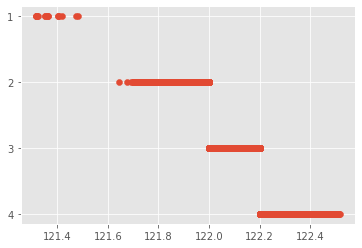

In [11]:
#using a scatter plot to visually assure the zones are correct
X = data['long']
Y = data['zone']
plt.scatter(X,Y)

In [12]:
#converting data type to integer
data['zone'] = data['zone'].astype(str).astype(int)

We will now limit the dataset to show homes only in zone 8b to focus on our clients specific issue– building homes that have usable outdoor space in a temperate area. 


In [13]:
#limiting the dataset to show homes only in zone 4
data = data[data['zone'] > 3]

In [14]:
#dropping lat, long, and zipcode because they are similar to zone
data.drop('lat', axis=1, inplace=True)
data.drop('long', axis=1, inplace=True)
data.drop('zipcode', axis=1, inplace=True)

In the interest of our client we also want them to know how much lawn size increases or decreases the value of the overall home. We are engineering a column that is the square footage of the lawn. 

In [15]:
#engineering columns that contain size of lawn 
data['sqft_lawn'] = data['sqft_lot'].subtract(data['sqft_living'])
data['sqft_lawn15'] = data['sqft_lot15'].subtract(data['sqft_living15'])

In [16]:
#dropping zone because it was just needed to limit the dataset 

data.drop('zone', axis=1, inplace=True)

The dataset now contains all columns needed for our analysis and is not missing any values. 

In [17]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,sqft_lawn,sqft_lawn15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,1340,5650,4470,4310
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1690,7639,4672,5949
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,2720,8062,9230,5342
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,1360,5000,3040,3640
6,257500.0,3,2.25,1715,6819,2.0,NONE,Average,7 Average,1715,?,1995,2238,6819,5104,4581


In [18]:
#checking null values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
sqft_lawn        0
sqft_lawn15      0
dtype: int64

In [19]:
#identify duplicate rows
duplicateRows = data[data.duplicated()]

#view duplicate rows
duplicateRows

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,sqft_lawn,sqft_lawn15
4348,259950.0,2,2.00,1070,649,2.0,NONE,Average,9 Better,720,350.0,2008,1070,928,-421,-142
20508,529500.0,3,2.25,1410,905,3.0,NONE,Average,9 Better,1410,0.0,2014,1510,1352,-505,-158
21458,359800.0,5,2.50,2170,2752,2.0,NONE,Average,8 Good,2170,0.0,2014,1800,2752,582,952


In [20]:
#dropping duplicate rows 
data.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,sqft_lawn,sqft_lawn15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,1340,5650,4470,4310
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1690,7639,4672,5949
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,2720,8062,9230,5342
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,1360,5000,3040,3640
6,257500.0,3,2.25,1715,6819,2.0,NONE,Average,7 Average,1715,?,1995,2238,6819,5104,4581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NONE,Average,8 Good,1180,130.0,2008,1330,1265,-16,-65
21592,360000.0,3,2.50,1530,1131,3.0,NONE,Average,8 Good,1530,0.0,2009,1530,1509,-399,-21
21593,400000.0,4,2.50,2310,5813,2.0,NONE,Average,8 Good,2310,0.0,2014,1830,7200,3503,5370
21594,402101.0,2,0.75,1020,1350,2.0,NONE,Average,7 Average,1020,0.0,2009,1020,2007,330,987


In [21]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,sqft_lawn,sqft_lawn15
count,1.221900e+04,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000
mean,5.400324e+05,3.257550,1.969351,1899.905311,8692.686063,1.445249,1556.620509,1960.372944,1791.730993,7942.623455,6792.780751,6150.892463
std,4.118560e+05,0.999856,0.796732,870.018663,17971.342268,0.563265,706.292556,31.140452,586.524152,11978.930863,17866.404299,11897.923209
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,460.000000,651.000000,-1900.000000,-1363.000000
25%,3.099500e+05,3.000000,1.000000,1290.000000,4400.000000,1.000000,1080.000000,1940.000000,1385.500000,4560.000000,2496.000000,2792.500000
50%,4.350000e+05,3.000000,2.000000,1730.000000,6604.000000,1.000000,1380.000000,1957.000000,1660.000000,6600.000000,4819.000000,4920.000000
75%,6.250000e+05,4.000000,2.500000,2310.000000,9085.000000,2.000000,1820.000000,1986.000000,2060.000000,8760.000000,7230.000000,7020.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,843309.000000,3.500000,8860.000000,2015.000000,5500.000000,380279.000000,839659.000000,378429.000000


## Data Analysis

As we can see in the histogram below a few of our variables do not have a normal distribution and the scales are not consistent. Our independent variable ‘price’ has a significant positive skew which we will need to adjust before modeling. 

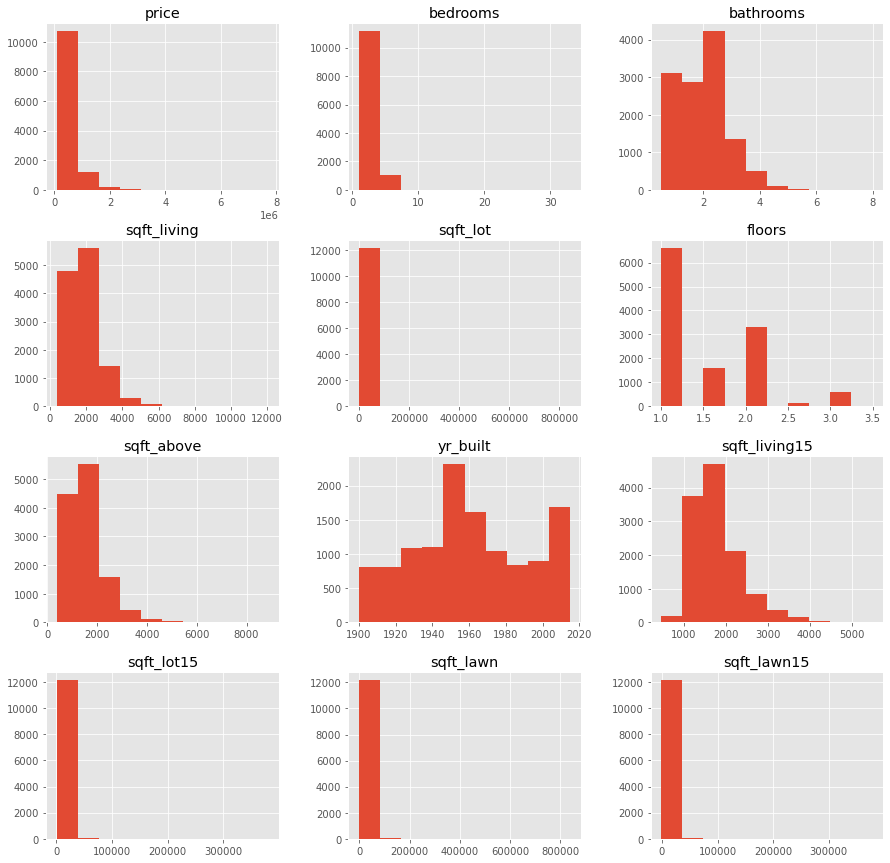

In [21]:
#Visually inspecting the data using histograms 
data.hist(figsize=(15, 15));

Let's visually inspect our categorical variables (view, condition, and grade). As we can see from the histogram below they have a strong linear relationship with price. 

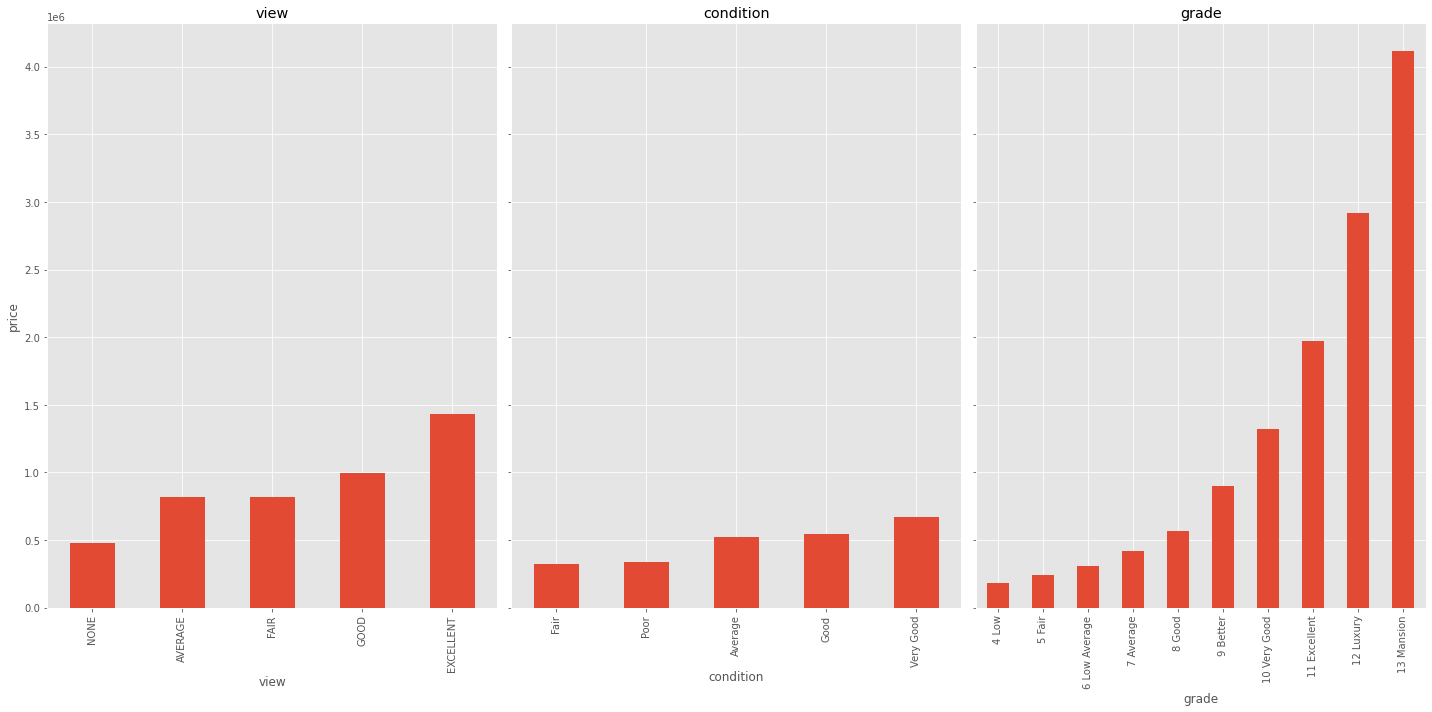

In [22]:
#plotting categorical variables 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)

categoricals = ['view', 'condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)               # group values together by column of interest
         .mean()['price']            #take the mean of the price for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    ax.set_ylabel('price')
    
fig.tight_layout()

In order to model our categorical variables they need to be dummy encoded. This means that each category will be converted into a new column and assigned a 1 or 0 to the column depending on the original column. We will use the pandas function get_dummies.  

In [23]:
#dummy enconding categorical variables 
dummies = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)
data = data.drop(categoricals, axis=1)
data = pd.concat([data, dummies], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,1340,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1690,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,2720,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,1360,...,1,0,0,0,0,0,0,1,0,0
6,257500.0,3,2.25,1715,6819,2.0,1715,?,1995,2238,...,0,0,0,0,0,0,0,1,0,0


When grade was dummy encoded spaces were added to the column names. This will cause issues later in our analysis. Let's rename the columns to not contain spaces. 

In [24]:
#renaming grade columns to contain no spaces 
data.rename(columns={'grade_11 Excellent': 'grade_Excellent', 'grade_12 Luxury': 'grade_Luxury', 'grade_13 Mansion': 'grade_Mansion', 'grade_4 Low': 'grade_Low', 'grade_5 Fair': 'grade_Fair','grade_6 Low Average': 'grade_Low_Average','grade_7 Average': 'grade_Average','grade_8 Good': 'grade_Good','grade_9 Better': 'grade_Better'}, inplace=True)

In [25]:
#sqft_basement had an object type so we will go ahead 
#and convert it to a float type 
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12219 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                12219 non-null  float64
 1   bedrooms             12219 non-null  int64  
 2   bathrooms            12219 non-null  float64
 3   sqft_living          12219 non-null  int64  
 4   sqft_lot             12219 non-null  int64  
 5   floors               12219 non-null  float64
 6   sqft_above           12219 non-null  int64  
 7   sqft_basement        11952 non-null  float64
 8   yr_built             12219 non-null  int64  
 9   sqft_living15        12219 non-null  int64  
 10  sqft_lot15           12219 non-null  int64  
 11  sqft_lawn            12219 non-null  int64  
 12  sqft_lawn15          12219 non-null  int64  
 13  view_EXCELLENT       12219 non-null  uint8  
 14  view_FAIR            12219 non-null  uint8  
 15  view_GOOD            12219 non-null 

In [26]:
#checking the dataframe for outliers
data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better


Later on in our notebook we will need to log transform some of our variables. So we'll go ahead and make a copy of the dataset to use later when interpreting our coefficients and RMSE values that is not log transformed. 

In [27]:
#making a copy of the dataset 
data_nolog = data.copy(deep=True)
data_nolog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12219 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                12219 non-null  float64
 1   bedrooms             12219 non-null  int64  
 2   bathrooms            12219 non-null  float64
 3   sqft_living          12219 non-null  int64  
 4   sqft_lot             12219 non-null  int64  
 5   floors               12219 non-null  float64
 6   sqft_above           12219 non-null  int64  
 7   sqft_basement        11952 non-null  float64
 8   yr_built             12219 non-null  int64  
 9   sqft_living15        12219 non-null  int64  
 10  sqft_lot15           12219 non-null  int64  
 11  sqft_lawn            12219 non-null  int64  
 12  sqft_lawn15          12219 non-null  int64  
 13  view_EXCELLENT       12219 non-null  uint8  
 14  view_FAIR            12219 non-null  uint8  
 15  view_GOOD            12219 non-null 

A heatmap of correlation was created to see what variables most correlated with our target variable price. This was also done to check for multicollinearity of features (i.e. if two variables are highly correlated with one another, like the number of sqft_living and sqft_above.)

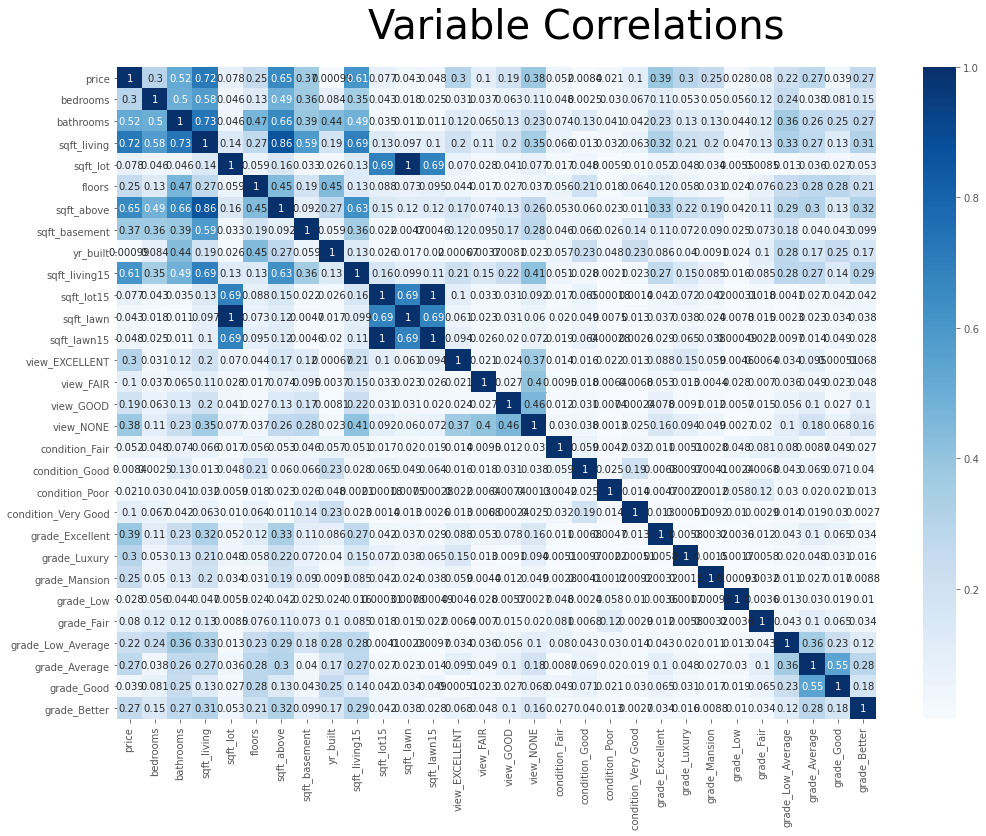

In [28]:
#checking variable correlations 
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

In [29]:
#creating list of features and correlations 
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [30]:
#checking for multicollinearity
MC_Features = []
MC_Corr = []
def check_MC(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .74 and idx != feature:
            MC_Features.append([feature, idx])
            MC_Corr.append(correlation)
            
for feature in corr:
    check_MC(feature)
MC_df = pd.DataFrame({'Correlations':MC_Corr, 'Features': MC_Features}).sort_values(by=['Correlations'], ascending=False)

In [31]:
#printing variable
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


,Correlations,Features
1,0.720040,sqft_living
2,0.653637,sqft_above
4,0.612030,sqft_living15
0,0.517365,bathrooms
7,0.385658,grade_Excellent
6,0.381624,view_NONE
3,0.370421,sqft_basement
5,0.302921,view_EXCELLENT
8,0.300534,grade_Luxury


Multicollinear Features


,Correlations,Features
1,0.998838,"[sqft_lot, sqft_lawn]"
4,0.998838,"[sqft_lawn, sqft_lot]"
3,0.998816,"[sqft_lot15, sqft_lawn15]"
5,0.998816,"[sqft_lawn15, sqft_lot15]"
0,0.859438,"[sqft_living, sqft_above]"
2,0.859438,"[sqft_above, sqft_living]"


We also wanted to check that the variables used for modeling passed the assumptions of linear regression. 
These assumptions are:  
-The variable should have a linear relationship with price.   
-The variable should be homoscedastic meaning that an equal amount of variance should be seen around the regression line.    
-There should be a normal distribution.   


Homoscedasticity assume that the residuals along the regression model have an equal amount of variabilty along the regression line. Sqft_living, sqft_living15, and sqft_above all show a funnel like shape in the pairplot below. This indicates that they do not meet assumptions for homoscedasticity, we will need to transform these variables before modeling. 

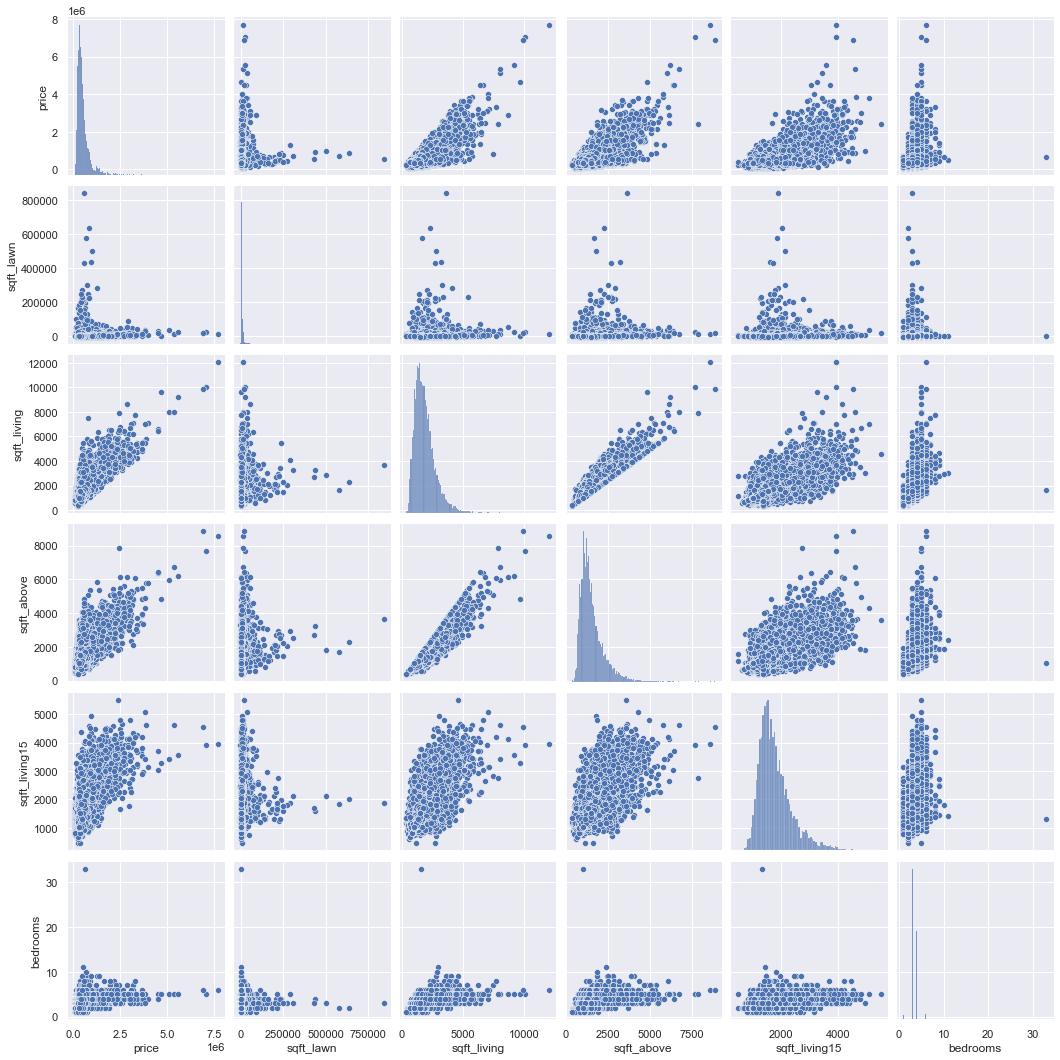

In [32]:
#using a pairplot to check for homoscedastiscity 
#in the most correlated variables 
sns.set()
cols = ['price', 'sqft_lawn','sqft_living', 'sqft_above', 'sqft_living15', 'bedrooms']
sns.pairplot(data[cols], size = 2.5)
plt.show();

Using a distribution plot we can see 'price' does not have a normal distribution and a positive skew. Using a QQ plot we can see the residuals do not fall along a relatively straight line. 

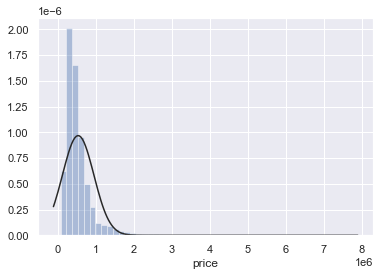

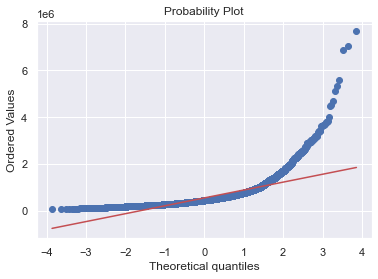

In [33]:
#This was checked using a QQ plot to make sure the residuals fell along a relatively straight line. 
#checking price for assumptions of linear regression 
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(data['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

Price needs to be log transformed so that it can meet the assumptions for linear regression. 

In [34]:
#applying log transformation
#fitting plot to normal distribution 
data['price'] = np.log(data['price'])

After log transforming price the histogram shows it has a normal distribution and the QQ Plot shows that the residuals fall along a straight line. 

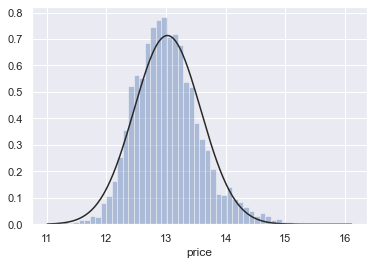

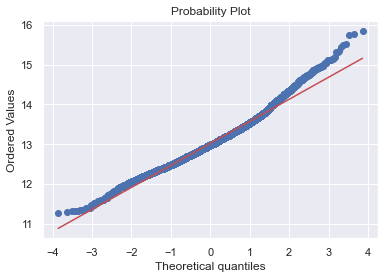

In [35]:
#transformed histogram and normal probability plot
sns.distplot(data['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

We repeat the steps with sqft_living, sqft_living15, and sqft_above. 

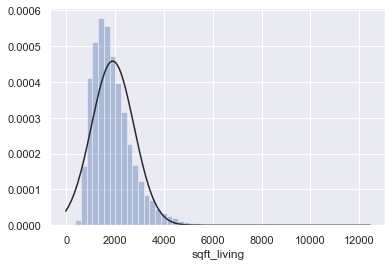

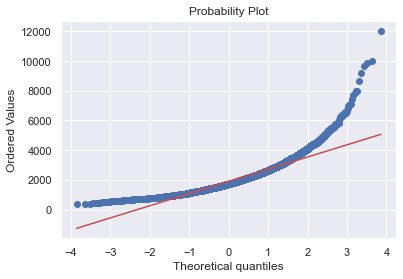

In [36]:
#histogram and normal probability plot
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living'], plot=plt)

In [37]:
#data transformation
data['sqft_living'] = np.log(data['sqft_living'])

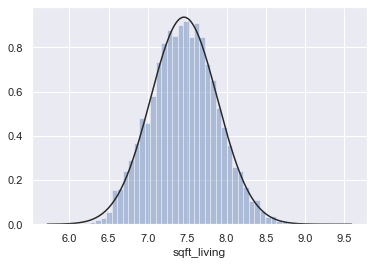

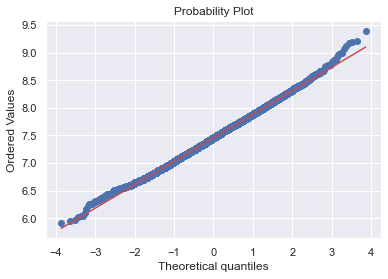

In [38]:
#transformed histogram and normal probability plot
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living'], plot=plt)

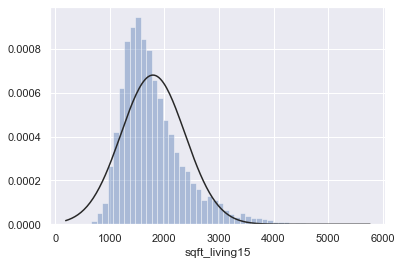

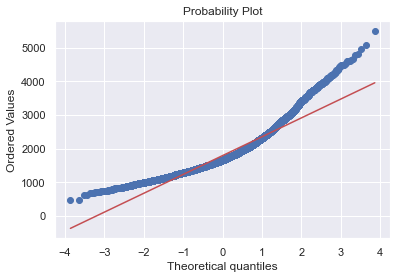

In [39]:
#histogram and normal probability plot
sns.distplot(data['sqft_living15'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living15'], plot=plt)

In [40]:
#data transformation
data['sqft_living15'] = np.log(data['sqft_living15'])

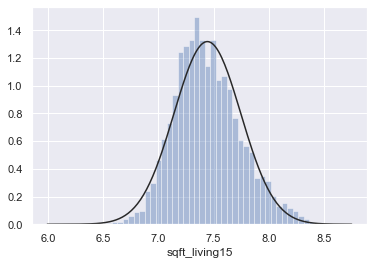

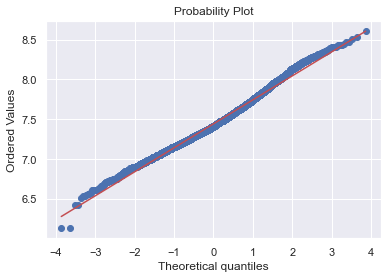

In [41]:
#histogram and normal probability plot
sns.distplot(data['sqft_living15'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living15'], plot=plt)

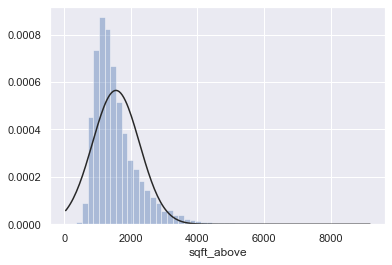

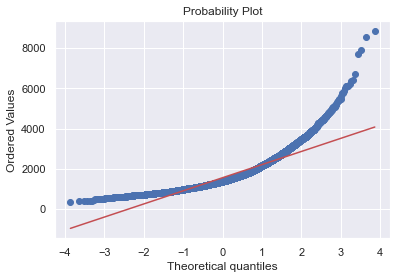

In [42]:
#histogram and normal probability plot
sns.distplot(data['sqft_above'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_above'], plot=plt)

In [43]:
#data transformation
data['sqft_above'] = np.log(data['sqft_above'])

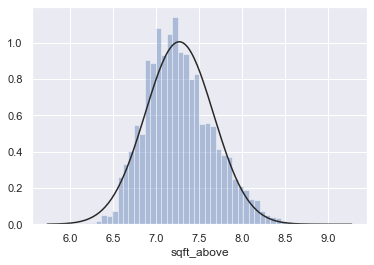

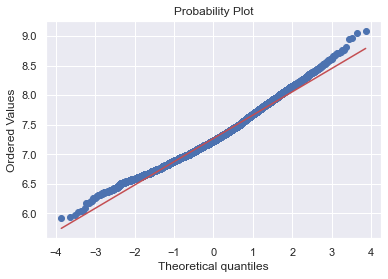

In [44]:
#histogram and normal probability plot
sns.distplot(data['sqft_above'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_above'], plot=plt)

Compared to our previous pairplot we can see that there is no longer a funnel like shape with our log transformed variables. This indicates that assumptions for linear regression are met and we can use these variables for modeling. 

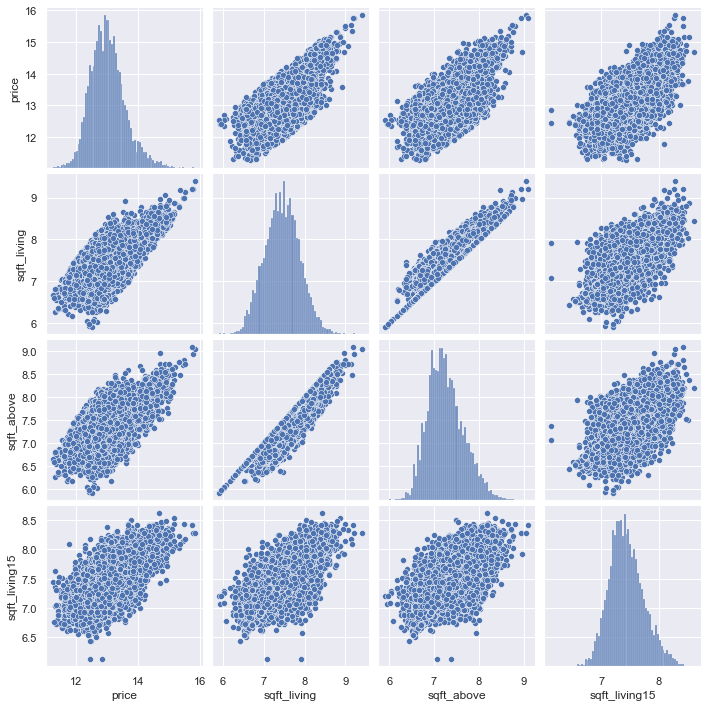

In [45]:
sns.set()
cols = ['price','sqft_living', 'sqft_above', 'sqft_living15']
sns.pairplot(data[cols], size = 2.5)
plt.show();

## Modeling
For modeling OLS regression was used and two values were looked at in the summary: R-squared and p-value. R-squared is a value that communicates how much of the variability around y ('price' in this case) can be explained by the model.  P-value is used to check the null hypothesis, in this case the null hypothesis was that there is no relationship between price and a chosen variable, if the p-value does not fall below 0.05 the null hypothesis cannot be rejected. 

### Model 1
The first model iterated looked at the most correlated features as well as sqft_lawn because this value is of interest to our client. 

In [60]:
#creating model with variables most highly correlated with price 
#including sqft_lawn because it is of concern to our stakeholder
Model_1 = smf.ols(formula='price ~ sqft_living + sqft_living15 + sqft_lawn + sqft_above + bathrooms', data=data).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     2032.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:33:58   Log-Likelihood:                -6539.5
No. Observations:               12219   AIC:                         1.309e+04
Df Residuals:                   12213   BIC:                         1.314e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5010      0.111     49.507      0.000       5.283       5.719
sqft_living       0.4886      0.019     25.081      0.000       0.450       0.527
sqft_living15     0.4663      0.017     27.549      0.000       0.433       0.500
sqft_lawn     -1.249e-06   2.11e-07     -5.907      0.000   -1.66e-06   -8.35e-07
sqft_above        0.0360      0.018      2.023      0.043       0.001       0.071
bathrooms         0.0778      0.007     11.159      0.000       0.064       0.092
==============================================================================
Omnibus:                      395.678   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.746
Skew:                          -0.154   Prob(JB):                     8.60e-48
Kurtosis:                       2.425   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2
In the second model we replace bathrooms with bedrooms because bathrooms had a high p-value. We need p-values below 0.05 in order to reject the null hypothesis. 

In [47]:
#replacing bathroom with bedroom because better p-value
Model_2 = smf.ols(formula='price ~ sqft_living + sqft_living15 + sqft_above + sqft_lawn + bedrooms', data=data).fit()
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2058.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:32:38   Log-Likelihood:                -6505.4
No. Observations:               12219   AIC:                         1.302e+04
Df Residuals:                   12213   BIC:                         1.307e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4151      0.099     44.641      0.000       4.221       4.609
sqft_living       0.6888      0.019     35.731      0.000       0.651       0.727
sqft_living15     0.4356      0.017     25.683      0.000       0.402       0.469
sqft_above        0.0629      0.018      3.570      0.000       0.028       0.097
sqft_lawn     -1.563e-06    2.1e-07     -7.428      0.000   -1.97e-06   -1.15e-06
bedrooms         -0.0670      0.005    -13.915      0.000      -0.076      -0.058
==============================================================================
Omnibus:                      214.131   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.247
Skew:                          -0.136   Prob(JB):                     2.13e-31
Kurtosis:                       2.549   Cond. No.                     5.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3
In the third model we remove sqft_above because it is highly correlated (0.85) with sqft_living. We do not want to have multicollinearity of features in our model because we need to be able to indicate where variance is coming from. 

In [48]:
#removing sqft_above because it's multicollinear with sqft_living
Model_3 = smf.ols(formula='price ~ sqft_living15 + sqft_living + sqft_lawn + bedrooms', data=data).fit()
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     2566.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:32:46   Log-Likelihood:                -6511.8
No. Observations:               12219   AIC:                         1.303e+04
Df Residuals:                   12214   BIC:                         1.307e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4812      0.097     46.103      0.000       4.291       4.672
sqft_living15     0.4419      0.017     26.183      0.000       0.409       0.475
sqft_living       0.7349      0.014     51.270      0.000       0.707       0.763
sqft_lawn     -1.516e-06    2.1e-07     -7.216      0.000   -1.93e-06    -1.1e-06
bedrooms         -0.0668      0.005    -13.871      0.000      -0.076      -0.057
==============================================================================
Omnibus:                      200.397   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.033
Skew:                          -0.122   Prob(JB):                     3.52e-29
Kurtosis:                       2.555   Cond. No.                     5.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 4
For our final model we added the most correlated to price dummy variables 'grade_Excellent', 'view_NONE', 'view_EXCELLENT', and 'grade_Luxury'.

In [49]:
#adding highly correlated dummy variables 
Model_4 = smf.ols(formula='price ~ sqft_living15 + sqft_living + sqft_lawn + bedrooms + grade_Excellent + view_NONE + view_EXCELLENT + grade_Luxury', data=data).fit()
Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1488.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:32:57   Log-Likelihood:                -6080.0
No. Observations:               12219   AIC:                         1.218e+04
Df Residuals:                   12210   BIC:                         1.224e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.9739      0.109     54.729      0.000       5.760       6.188
sqft_living15       0.3349      0.017     19.920      0.000       0.302       0.368
sqft_living         0.6552      0.014     46.450      0.000       0.628       0.683
sqft_lawn        -1.74e-06   2.03e-07     -8.572      0.000   -2.14e-06   -1.34e-06
bedrooms           -0.0499      0.005    -10.637      0.000      -0.059      -0.041
grade_Excellent     0.5327      0.034     15.585      0.000       0.466       0.600
view_NONE          -0.1939      0.013    -15.478      0.000      -0.218      -0.169
view_EXCELLENT      0.2828      0.029      9.879      0.000       0.227       0.339
grade_Luxury        0.6802      0.071      9.600      0.000       0.541       0.819
==============================================================================
Omnibus:                      244.212   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.436
Skew:                          -0.106   Prob(JB):                     2.62e-32
Kurtosis:                       2.509   Cond. No.                     5.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Final model 
Model 4 has the highest r-squared value at 0.546. R-squared is a value that communicates how much of the variability around y ('price' in this case) can be explained by the model. In this case it means that 54.6% of the variability in our model can be explained by the variable we included. However, since this model does contain several log transformed variables we will go ahead and run it again using data that hasn't been log transformed to simplify interpreting coefficients. 

In [62]:
Model_F = smf.ols(formula='price ~ sqft_living15 + sqft_living + sqft_lawn + bedrooms + grade_Excellent + view_NONE + view_EXCELLENT + grade_Luxury', data=data_nolog).fit()
Model_F.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     2503.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:38:32   Log-Likelihood:            -1.6938e+05
No. Observations:               12219   AIC:                         3.388e+05
Df Residuals:                   12210   BIC:                         3.388e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.024e+04   1.35e+04      2.975      0.003    1.37e+04    6.68e+04
sqft_living15     113.0400      5.630     20.079      0.000     102.005     124.075
sqft_living       263.1863      4.469     58.893      0.000     254.427     271.946
sqft_lawn          -1.0555      0.129     -8.161      0.000      -1.309      -0.802
bedrooms        -4.702e+04   2884.081    -16.303      0.000   -5.27e+04   -4.14e+04
grade_Excellent  5.987e+05   2.24e+04     26.696      0.000    5.55e+05    6.43e+05
view_NONE       -6.762e+04   8044.227     -8.406      0.000   -8.34e+04   -5.19e+04
view_EXCELLENT   3.303e+05   1.83e+04     18.097      0.000    2.94e+05    3.66e+05
grade_Luxury     1.139e+06   4.59e+04     24.798      0.000    1.05e+06    1.23e+06
==============================================================================
Omnibus:                     6031.230   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207916.195
Skew:                           1.736   Prob(JB):                         0.00
Kurtosis:                      22.908   Cond. No.                     3.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Intepreting Coefficients


In [63]:
#printing coefficient values  
print(Model_F.params)

Intercept          4.023753e+04
sqft_living15      1.130400e+02
sqft_living        2.631863e+02
sqft_lawn         -1.055463e+00
bedrooms          -4.701789e+04
grade_Excellent    5.986921e+05
view_NONE         -6.761979e+04
view_EXCELLENT     3.302665e+05
grade_Luxury       1.139040e+06
dtype: float64


Interpreting our coefficients we can see for each additional square foot a home has increases the price by 263.19USD. Sqft_living15 takes the average size of the 15 nearest homes. We can see that when the average size of these homes goes up a square foot it increases the overall value by 113.04USD. Each additional bedroom also decreases the value of the home by 47,017USD. 

Of concern to our client is the lawn’s size effect on home value. Here we can see that each additional square foot of lawn decreases the price of the home by 1.05USD. Having an excellent view also makes a substantial difference–adding 330,300USD to the home, whereas no view actually decreases the home's value by 67,620USD. 

Quality or grade of the home has a significant impact on price, with an excellent grade adding 595,692USD and a luxury grade adding 1,139,040USD to the value of the home. 


## Evaluation

### Validating the Model  
To evaluate the performance of our final model it was cross-validated using a train test split. Cross validating the model allows us to know how well the model would serve if new data was presented. 


In [64]:
#doing a 75/25 train/test split 
train, test = train_test_split(data_nolog)

In [65]:
#the train dataset 
train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better
4731,405100.0,2,1.00,840,3522,1.0,840,0.0,1947,1390,...,0,0,0,0,0,0,1,0,0,0
13998,450000.0,4,2.75,2310,5650,1.0,1330,980.0,1952,2300,...,0,0,0,0,0,0,0,0,1,0
12027,338995.0,3,1.75,1320,9450,1.0,1320,0.0,1943,1320,...,1,0,0,0,0,0,0,1,0,0
15389,380000.0,2,1.00,700,4836,1.0,700,0.0,1926,1190,...,0,0,0,0,0,0,1,0,0,0
523,235000.0,4,1.50,1690,11054,1.0,1690,0.0,1930,1690,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,359950.0,3,1.75,1570,6975,1.0,1040,530.0,1979,1280,...,0,0,0,0,0,0,0,1,0,0
4375,1050000.0,3,3.00,3250,5093,2.0,3250,0.0,2004,2820,...,0,0,0,0,0,0,0,0,0,0
1929,598800.0,6,4.00,4470,17877,3.0,3230,1240.0,2013,1790,...,0,0,0,0,0,0,0,0,0,1
13195,551000.0,2,2.00,2260,9604,1.0,2260,0.0,1990,2260,...,0,0,0,0,0,0,0,0,0,1


In [66]:
#the test dataset 
test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better
11192,595000.0,3,2.25,2400,16301,1.0,1400,1000.0,1962,1720,...,0,0,0,0,0,0,0,0,1,0
15836,205000.0,4,1.00,1340,7920,1.0,1340,0.0,1970,1090,...,0,0,0,0,0,0,0,1,0,0
21356,490000.0,5,3.50,4460,2975,3.0,3280,NaN,2015,2490,...,0,0,0,0,0,0,0,0,0,0
8421,349950.0,3,2.50,1420,1162,3.0,1420,0.0,2002,1430,...,0,0,0,0,0,0,0,0,1,0
12028,615000.0,3,1.75,2620,8280,1.0,1330,1290.0,1948,1530,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17446,219500.0,3,1.00,1090,6710,1.5,1090,0.0,1912,1170,...,1,0,0,0,0,1,0,0,0,0
945,260000.0,4,1.75,1810,7480,1.0,1230,580.0,1977,1870,...,0,0,0,0,0,0,0,1,0,0
19160,430000.0,4,1.75,1890,6000,1.0,1110,780.0,1947,1560,...,0,0,0,0,0,0,1,0,0,0
4122,480000.0,5,2.25,2240,5500,1.0,1490,750.0,1959,2010,...,0,0,0,0,0,0,0,1,0,0


In [67]:
#using Model 4 variables for cross validation because it had the best R-squared value 

y = data_nolog[['price']]
X = data_nolog[['sqft_lawn','sqft_living', 'sqft_living15', 'bedrooms', 'grade_Excellent', 'view_EXCELLENT', 'grade_Luxury', 'view_NONE']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
#X_train dataset 
X_train

,sqft_lawn,sqft_living,sqft_living15,bedrooms,grade_Excellent,view_EXCELLENT,grade_Luxury,view_NONE
4638,10534,1400,2080,4,0,0,0,1
2136,6690,1560,1870,4,0,0,0,1
15254,-311,1600,1600,3,0,0,0,1
12414,133175,3740,2400,3,1,0,0,1
3564,4210,1290,1680,3,0,0,0,1
...,...,...,...,...,...,...,...,...
6125,5810,1190,1350,3,0,0,0,1
17485,4580,1420,1480,3,0,0,0,1
19866,-659,1510,1300,2,0,0,0,1
6483,5887,810,1140,2,0,0,0,1


In [69]:
#splitting data into random train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
#fitting linear model with coeffiecients 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#### RMSE
Root-mean-square error (RMSE) is a measure that shows the deviation between values predicted by a model and the observed values. The deviations are called residuals when performed over sample data and they are called errors when performed on out-of-sample data. It is a measure of accuracy to compare the predictive abilities of different models for a particular dataset. It is one of the fastest methods of analysis and not as sensitive to outliers. Here we use scikits mean_squared_error feature to obtain the value. 

In [71]:
#returning the RMSE by setting squared=False
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train, squared=False)
test_mse = mean_squared_error(y_test, y_hat_test, squared=False)
print('Train Root Mean Squared Error:', train_mse)
print('Test Root Mean Squared Error:', test_mse)

Train Root Mean Squared Error: 250804.4257848117
Test Root Mean Squared Error: 261532.8319164979


Of concern is overfitting the model-- this occurs when the model fits the noise of our data, but performs poorly when presented with new data. A good indicator of overfitting is if the training dataset is significantly better than the test dataset. In this case, the Train Root Mean Squared Error was 250,804USD and the Test Root Mean Squared Error was 261,532USD seeing as how our data ranges from 78,000USD to 7,700,000USD a difference of 10,728USD between the train and test RMSE means overfitting is not of significant concern. 

## Conclusion 
 
Our client, Steady, is building a neighborhood of homes for people who want to use their yards. Our analysis indicates that the best predictor of a house’s price in King County, Seattle in zone 8b is 'sqft_lawn', 'sqft_living',  'sqft_living15',  'bedrooms',  'grade_Excellent', 'view_EXCELLENT',  'grade_Luxury',  'view_NONE'. We discovered that certain features had a positive impact on price, such as, the square footage of the home, the square footage of the nearest 15 homes, an excellent or luxury grade, and an excellent view. While features like square footage of lawn, number of bedrooms, and no view had a negative impact on price. Some limitations of our model is that this housing data is from May 2014 to 2015. Meaning that as housing trends change the model may no longer accurately reflect current housing patterns. 
### Recommendation
Our recommendation to Steady is to build a neighborhood of equally larger homes (~2,000 square feet), of excellent quality (quality is also referred to as grade), and an excellent view. An excellent grade means a home has a custom design and high quality cabinet work, wood trim, and highest quality materials. An excellent grade can increase the value of home by 595,692USD 

We recommend building a community of large luxury homes that are at least 2,000 square feet. Large homes are recommended because each additional square foot the home has adds 263.19USD to its value. We also recommend that all the homes built be of similar size. Our analysis shows that when the average size of the 15 nearest homes goes up a square foot it increases their overall value by 113.04USD. This means that a neighborhood of larger homes would be more valuable than a neighborhood of variable size homes. We would also warn our client that fewer bedrooms is favorable because each additional bedroom has the potential to devalue the home by 47,017USD. 

Of concern to our client is the lawn’s size effect on home value. Our analysis shows that each additional square foot of lawn decreases the price of the home by 1.05USD. When designing the layout of the lot Steady needs to carefully consider how much lawn space there is as it will slightly decrease the value of the home. Having an excellent view also makes a substantial difference–adding 330,300USD to the value of the home, whereas no view actually decreases the home's value by 67,620USD.  

## For More Information 
For additional info, contact Salome Grasland at salome.grasland@ncf.edu

## Repository Structure
├── README.md                           <- The top-level README for reviewers of this project    
├── Phase 2 Project.ipynb               <- Narrative documentation of analysis in Jupyter notebook     
├── Phase 2 Project Presentation.pdf    <- PDF version of project presentation     
├── data                                <- Both sourced externally and generated from code     
└── images                              <- Both sourced externally and generated from code      

## References 
https://www.kaggle.com/code/henriqueyamahata/boston-housing-with-linear-regression      
https://www.kaggle.com/code/madislemsalu/predicting-housing-prices-in-king-county-usa    
https://github.com/mojo-flat/Linear-Regression-GP-2/blob/main/lin_reg_gp_2_solution.ipynb     
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/#:~:text=Interpret%20the%20coefficient%20as%20the,variable%20increases%20by%20about%200.20%25.   
https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db#:~:text=Dummy%20encoding%20also%20uses%20dummy,uses%20k%2D1%20dummy%20variables.       
https://towardsdatascience.com/busted-assumptions-3e224b7706eb    
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/     
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r    
